# Statistical Modeling
There are different types of statistical models but one of the most popular is regression. This notebook will demonstrate simple linear regression i.e. regression with one explanatory variable.

I'll demonstrate how to build a regression model using two libraries: `statsmodels` and `sklearn`. The results will be the same but feel free to pick your preference while working on the homework.

In [2]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

## Load & Explore the Data

In [4]:
df = pd.read_csv('tourism.csv')
df.head() #view a sample of the data

,year,visitor_count_tho,tourist_spending
0,1963,198,7
1,1964,229,8
2,1965,361,13
3,1966,449,12
4,1967,574,13


In [5]:
df.describe()

,year,visitor_count_tho,tourist_spending
count,47.000000,47.000000,47.000000
mean,1986.000000,6371.765957,3825.595745
std,13.711309,7356.590190,4877.672327
min,1963.000000,198.000000,7.000000
25%,1974.500000,1314.500000,186.500000
50%,1986.000000,2614.000000,1482.000000
75%,1997.500000,9151.500000,6329.000000
max,2009.000000,27077.000000,16761.000000


`Brief summary:` the dataset contains three variables: year, visitor_count_tho and tourist_spending. The years range from 1963 to 2009, and during this timeframe Turkey had 198 to 27077 visitors and their spending ranges from 7 to 16761. The tourist spending is right-skewed based on analyzing the mean and median. Let's take a look at the histogram to demonstrate this.

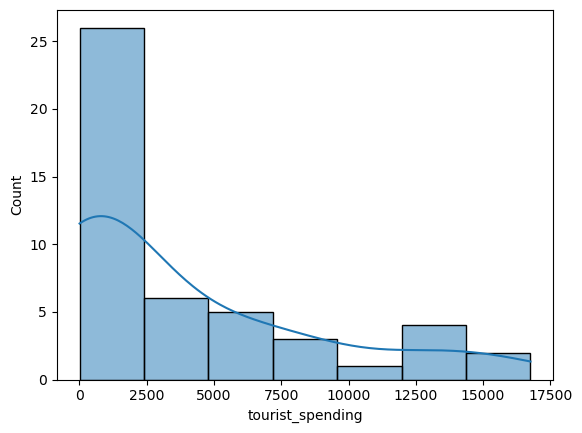

In [7]:
sns.histplot(data=df, x='tourist_spending', kde=True)
plt.show()

In [8]:
#TODO: plot the visitor count. Is it skewed?

Let's now explore the relationship between the visitor count and the tourist spending using a scatterplot.

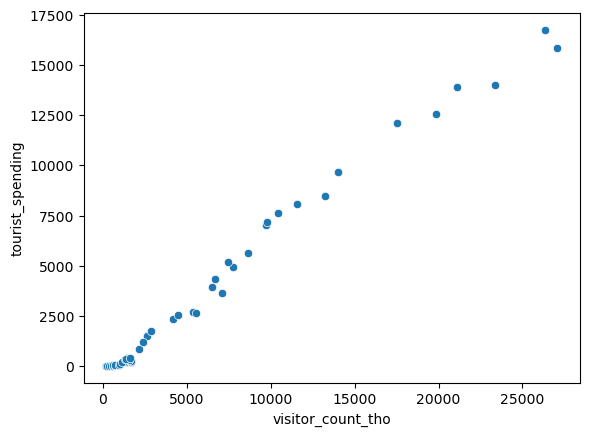

In [10]:
sns.scatterplot(data=df, x='visitor_count_tho', y='tourist_spending')
plt.show()

`Brief summary:` there is a positive linear relationship between the visitor count and the tourist spending. As the number of visitors increase, so does the spending from tourism.

## Simple Linear Regression
Let's now build a simple linear regression model to predict tourist spending based on the visitor count. The example below demonstrates how to build the regression model using the `sklearn` library. We will then predict the tourist spending for 30,000 visitors.

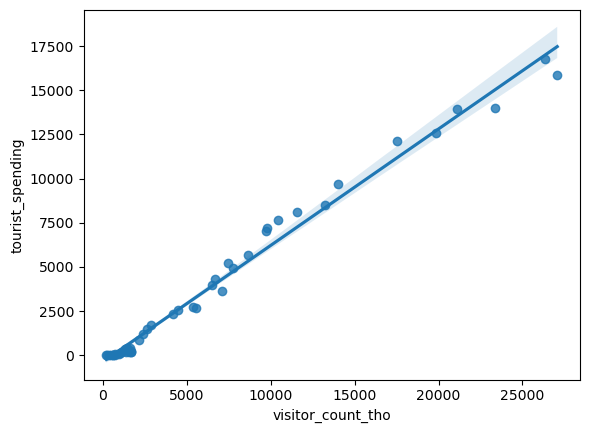

In [46]:
#Lets visualize this data again and show the trend line
sns.regplot(data=df, x='visitor_count_tho', y='tourist_spending') #display the trend line using regplot
plt.show()

In [14]:
X = df['visitor_count_tho'].to_numpy() #get the explanatory variable
X = X.reshape(-1, 1)

y = df['tourist_spending'].to_numpy()  #get the response variable
y = y.reshape(-1, 1)

lr_model = LinearRegression(fit_intercept=True) #initialize the regression model
lr_model = lr_model.fit(X, y)                   #fit the data to the model i.e. find the line of best fit

#display the parameters for the slope and intercept
print('The intercept is: ', lr_model.intercept_[0])
print('The slope is: ', lr_model.coef_[0,0])

The intercept is:  -373.6111019893692
The slope is:  0.6590334413903769


In [15]:
#get r-squared, i.e. the coefficient of determination
r_sqrd = lr_model.score(X, y)
r_sqrd = round(r_sqrd, 5)

print('r-squared is: ', r_sqrd)


r-squared is:  0.98797


### Predict the tourist spending for 30,000 visitors

In [49]:
#make a prediction?
num_visitors = np.array([30000]).reshape(-1, 1)
lr_model.predict(num_visitors)

array([[19397.39213972]])

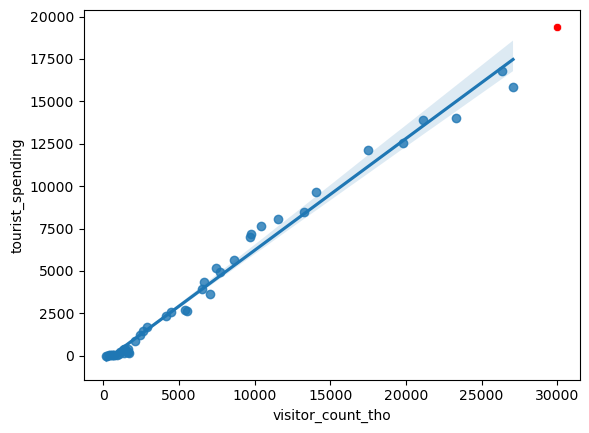

In [18]:
#visualize the prediction

fig = plt.figure()

sns.regplot(data=df, x='visitor_count_tho', y='tourist_spending')

sns.scatterplot(x=[30000], y=[19397], color='red')

plt.show()


## Simple Linear Regression
This demonstrates how to build a regression model using the **ols()** function from the `statsmodels` library.

In [20]:
lr_model2 = ols('tourist_spending ~ visitor_count_tho', data = df)
lr_model2 = lr_model2.fit()

print(lr_model2.params)


Intercept           -373.611102
visitor_count_tho      0.659033
dtype: float64


In [21]:
#get r-squared, i.e. the coefficient of determination
print('r squared is: ', lr_model2.rsquared)

r squared is:  0.9879677967686257


In [22]:
#RSE: the residual standard error
mse = lr_model2.mse_resid
rse = np.sqrt(mse)
print('The RSE is: ', rse)


The RSE is:  540.9509156533818


In [23]:
#TODO: use the statsmodels library to predict the spending for 30000 visitors